['../logs/main/ResNet18/CIFAR10/Hessian/0.1/42/0.99/20250209233427/test/final_weight', '../logs/main/ResNet18/CIFAR10/HessianParam/0.1/42/0.99/20250209232459/test/final_weight', '../logs/main/ResNet18/CIFAR10/Jacobian/0.1/42/0.99/20250224231350/test/final_weight', '../logs/main/ResNet18/CIFAR10/JacobianParam/0.1/42/0.99/20250227084016/test/final_weight', '../logs/main/ResNet18/CIFAR10/L1/0.1/42/0.99/20250209211333/test/final_weight', '../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight']
{'clean': [65.59, 90.75, 18.41, 86.8, 37.74, 95.13], 'brightness': [64.208, 88.88, 18.362, 84.578, 36.828, 93.98], 'contrast': [48.434, 65.598, 14.54, 59.894, 20.078, 78.306], 'defocus_blur': [53.532, 77.012, 17.34, 68.95, 23.474, 83.324], 'elastic_transform': [54.962, 76.978, 17.776, 71.508, 26.32, 85.36], 'fog': [57.702, 79.666, 16.48, 74.696, 24.604, 88.902], 'frost': [47.426, 68.496, 17.07, 64.428, 33.692, 78.996], 'gaussian_blur': [46.384, 68.214, 16.484, 59.258, 21.392,

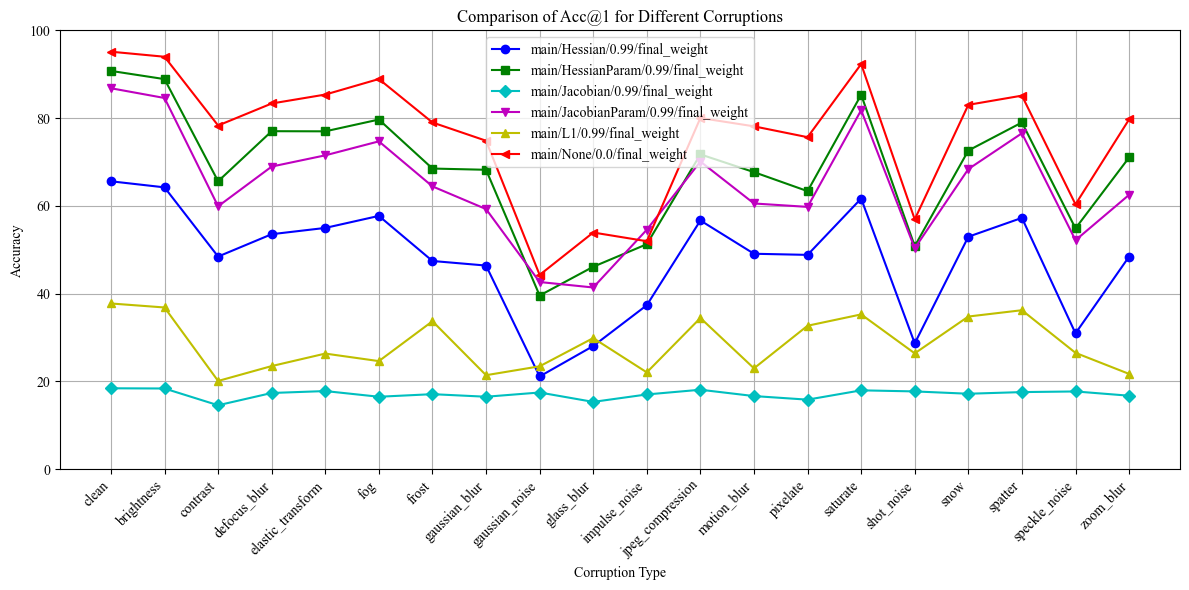

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import glob
font_path = '/home/ueno/fonts/times.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'

Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.99/*/test/final_weight'))
paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')
# paths.append('/home/ueno/pruning/test/logs/ASAM/ResNet18/CIFAR10/None/0.1/42/0.0/20250219102225/test/final_weight')
print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>']
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[-10]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), color=colors[i], linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[-10]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type', fontfamily='Times New Roman')
plt.ylabel('Accuracy', fontfamily='Times New Roman')
plt.title('Comparison of Acc@1 for Different Corruptions', fontfamily='Times New Roman')
plt.xticks(rotation=45, ha='right', fontfamily='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()

In [4]:
print(Acc1_dict)
acc_list = [0.0 for _ in range(Acc1_dict['clean'].__len__())]
for key in Acc1_dict.keys():
    if key == 'clean':
        continue
    for i in range(Acc1_dict[key].__len__()):
        acc_list[i] += Acc1_dict[key][i]
# 平均ほしい
acc_list = [acc / 19 for acc in acc_list]
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], acc_list[i])

{'clean': [65.59, 90.75, 18.41, 86.8, 37.74, 95.13], 'brightness': [64.208, 88.88, 18.362, 84.578, 36.828, 93.98], 'contrast': [48.434, 65.598, 14.54, 59.894, 20.078, 78.306], 'defocus_blur': [53.532, 77.012, 17.34, 68.95, 23.474, 83.324], 'elastic_transform': [54.962, 76.978, 17.776, 71.508, 26.32, 85.36], 'fog': [57.702, 79.666, 16.48, 74.696, 24.604, 88.902], 'frost': [47.426, 68.496, 17.07, 64.428, 33.692, 78.996], 'gaussian_blur': [46.384, 68.214, 16.484, 59.258, 21.392, 74.836], 'gaussian_noise': [21.104, 39.552, 17.448, 42.632, 23.42, 44.252], 'glass_blur': [28.04, 46.11, 15.308, 41.384, 29.854, 53.916], 'impulse_noise': [37.346, 51.252, 17.004, 54.554, 22.036, 51.93], 'jpeg_compression': [56.658, 71.726, 18.078, 70.096, 34.432, 80.022], 'motion_blur': [49.074, 67.68, 16.636, 60.534, 22.958, 78.116], 'pixelate': [48.818, 63.344, 15.818, 59.758, 32.668, 75.646], 'saturate': [61.654, 85.314, 17.942, 81.796, 35.25, 92.314], 'shot_noise': [28.654, 50.814, 17.696, 50.33, 26.37, 56.91

In [4]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
from tqdm import tqdm
import sys
sys.path.append('..')
from src.model import CNNModel

# モデルのロード
model_path = "/home/ueno/pruning/test/logs/main/ResNet18/CIFAR100/None/0.1/42/0.0/20250228021055/ckpt/final_weight.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet18の定義
model = CNNModel(model='ResNet18', classes=100, pretrained=False)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# 画像データセットの準備
data_dir = "/home/ueno/dataset/CIFAR-100-C-ImageFolder/brightness"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

def evaluate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        loop = tqdm(dataloader)
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return accuracy

accuracy = evaluate_accuracy(model, dataloader, device)

print(f"Accuracy on CIFAR-100-C (brightness): {accuracy * 100:.2f}%")

100%|██████████| 1563/1563 [00:48<00:00, 31.91it/s]

Accuracy on CIFAR-100-C (brightness): 9.18%


In [5]:
import torch
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('..')
from src.model import CNNModel

# モデルのロード
model_path = "/home/ueno/pruning/test/logs/main/ResNet18/CIFAR100/None/0.1/42/0.0/20250228021055/ckpt/final_weight.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet18 の定義
model = CNNModel(model='ResNet18', classes=100, pretrained=False)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# .npy ファイルから画像データを読み込み，前処理を行う Dataset を定義
class CIFAR100CNPY(torch.utils.data.Dataset):
    def __init__(self, images_file, labels, transform=None):
        # 画像データの読み込み (.npy ファイルは (N, H, W, C) と仮定)
        images = np.load(images_file)  # shape: (N, H, W, C)
        self.images = torch.from_numpy(images)  # Tensor に変換
        # チャンネル順を (C, H, W) に変換（必要な場合）
        if self.images.ndim == 4 and self.images.shape[-1] == 3:
            self.images = self.images.permute(0, 3, 1, 2)
        # 画素値を 0-255 から 0-1 にスケーリング
        self.images = self.images.float() / 255.0
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return self.images.size(0)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        if self.transform is not None:
            img = self.transform(img)
        return img, label

# 正規化のための変換（CIFAR-100 の平均・標準偏差）
normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                 std=[0.2675, 0.2565, 0.2761])

# 画像とラベルの読み込み (.npy ファイル)
images_file = "/home/ueno/dataset/CIFAR-100-C/brightness.npy"
labels_file = "/home/ueno/dataset/CIFAR-100-C/labels.npy"
labels = torch.tensor(np.load(labels_file))  # ラベルを tensor に変換

# Dataset の作成
dataset = CIFAR100CNPY(images_file, labels, transform=normalize)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

def evaluate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        loop = tqdm(dataloader)
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total
    return accuracy

accuracy = evaluate_accuracy(model, dataloader, device)
print(f"Accuracy on CIFAR-100-C (brightness): {accuracy * 100:.2f}%")


100%|██████████| 1563/1563 [00:06<00:00, 259.07it/s]

Accuracy on CIFAR-100-C (brightness): 73.84%
